# Predictive Model for Popularity of Spotify Tracks

This notebook contains a brief analysis of 160,000 spotify songs. Then, using a random forest regression, trains a model for predicting the popularity of spotify songs based on 12 different metrics.

### Import and prepare data

In [59]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [14]:
# Import data
df = pd.read_csv('Desktop/data 9.csv', index_col=14)

In [15]:
df.shape

(170653, 18)

In [16]:
# Drop id column
df.drop('id', axis=1, inplace=True)

In [17]:
# Convert duration to minutes
df['duration_m'] = df['duration_ms']/60000
df.drop('duration_ms', axis=1, inplace=True)

In [18]:
df.head()

,valence,year,acousticness,artists,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,duration_m
name,,,,,,,,,,,,,,,,,
"Piano Concerto No. 3 in D Minor, Op. 30: III. Finale. Alla breve",0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,0.211,0,0.878000,10,0.665,-20.096,1,4,1921,0.0366,80.954,13.861117
Clancy Lowered the Boom,0.9630,1921,0.732,['Dennis Day'],0.819,0.341,0,0.000000,7,0.160,-12.441,1,5,1921,0.4150,60.936,3.008883
Gati Bali,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,0.166,0,0.913000,3,0.101,-14.850,1,5,1921,0.0339,110.339,8.334367
Danny Boy,0.1650,1921,0.967,['Frank Parker'],0.275,0.309,0,0.000028,5,0.381,-9.316,1,3,1921,0.0354,100.109,3.500000
When Irish Eyes Are Smiling,0.2530,1921,0.957,['Phil Regan'],0.418,0.193,0,0.000002,3,0.229,-10.096,1,2,1921,0.0380,101.665,2.778217


## Data Analysis

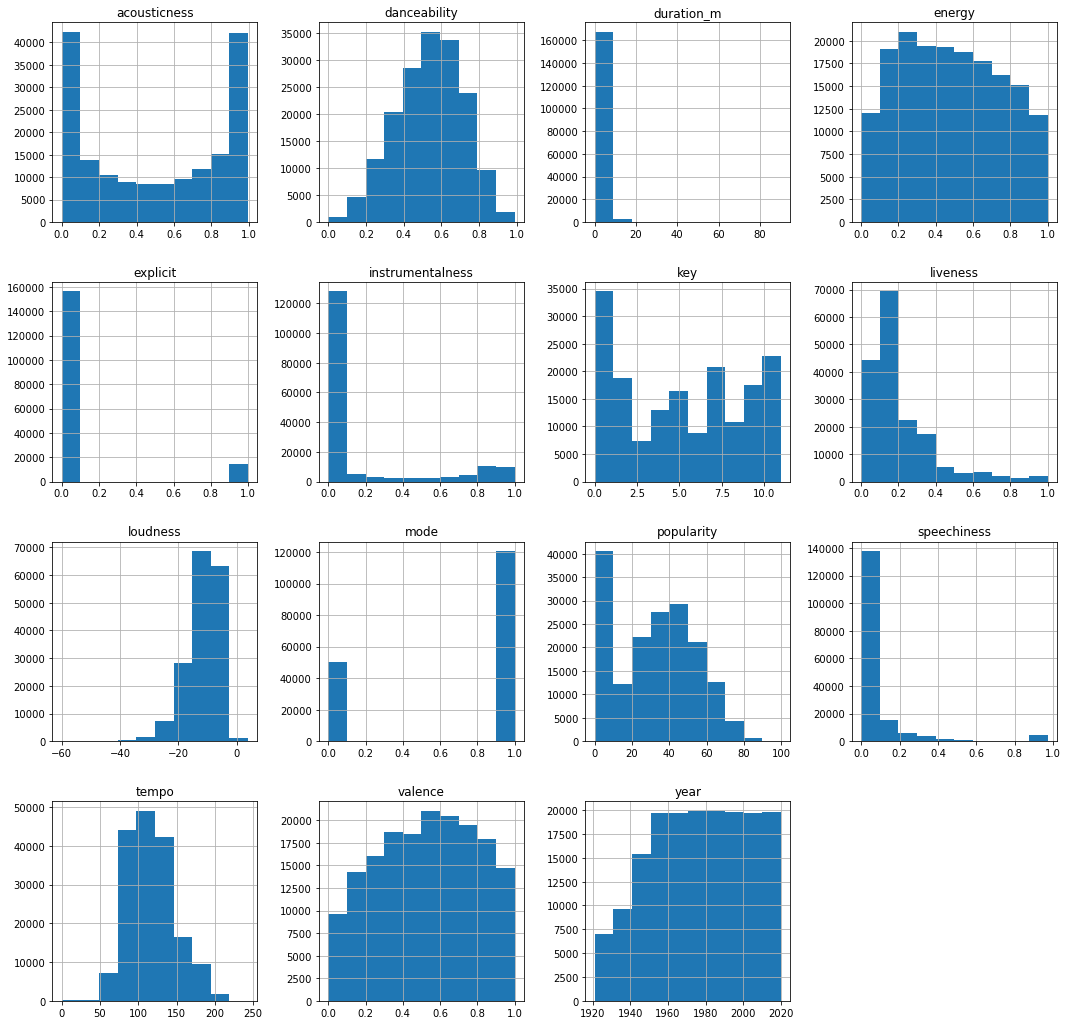

In [19]:
# Plot distribution of each column
df.hist(figsize = (18,18))
plt.show()

In [195]:
# Percentage of tracks with zero popularity
pct_zero = df[df['popularity']==0].count()[0]/df.shape[0]*100
print("{}% of tracks have zero popularity".format(pct_zero.round(2)))

16.34% of tracks have zero popularity


<Figure size 1440x1008 with 0 Axes>

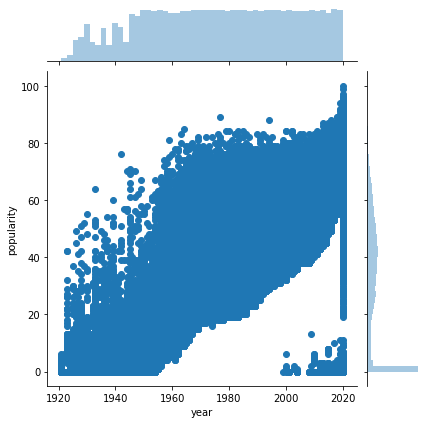

In [125]:
# Plotting popularity against year of track
plt.figure(figsize=(20, 14))
sns.jointplot(df['year'],df['popularity'])

Text(0.5, 1.0, 'Correlation Map')

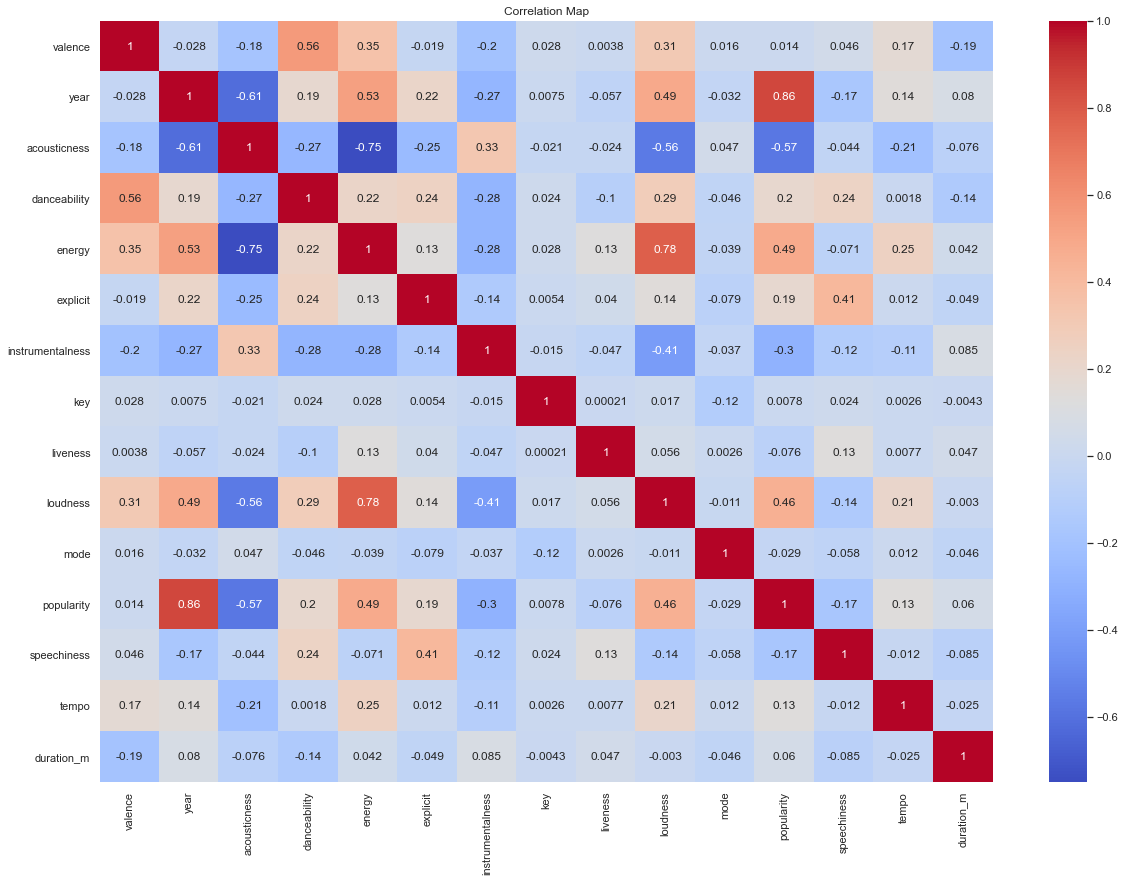

In [198]:
# Heat map display of correlation levels
plt.figure(figsize=(20, 14))
sns.set(style="whitegrid")
corr = df.corr()
ax = sns.heatmap(corr,annot=True,cmap="coolwarm")
ax.set_title('Correlation Map')

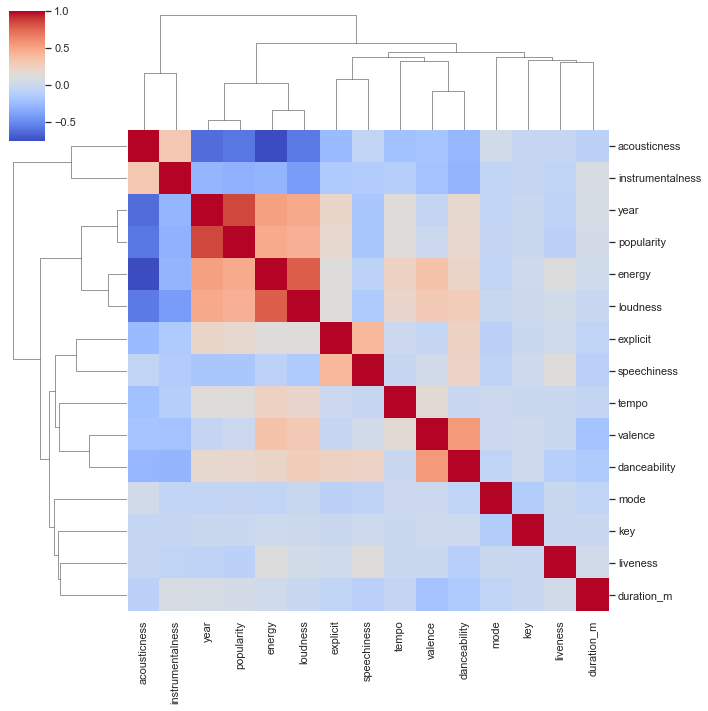

In [200]:
# Cluster map based on correlation levels
sns.clustermap(corr,cmap="coolwarm")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

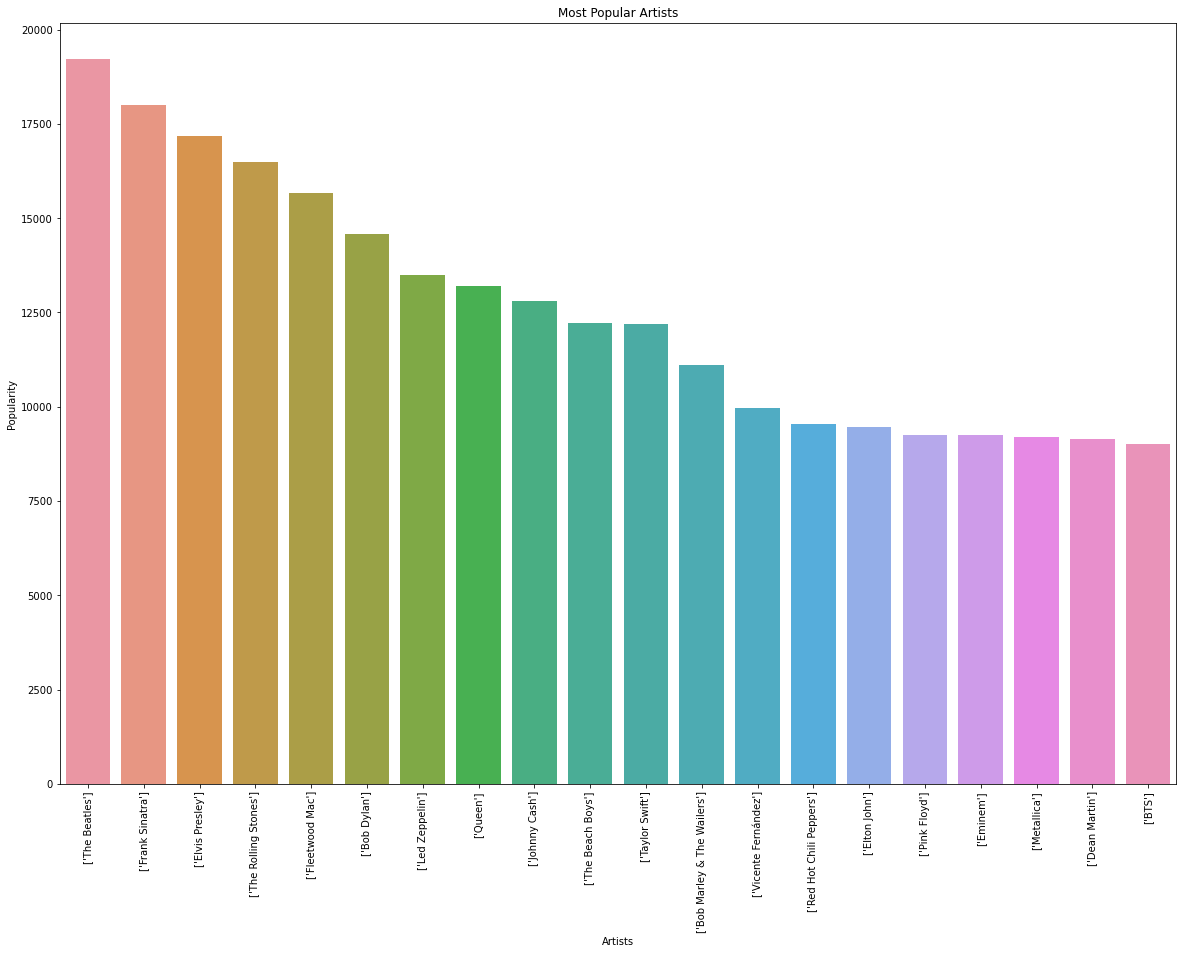

In [26]:
# Group tracks by artist, plot most popular
plt.figure(figsize=(20, 14))
x = df.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x.index, x)
ax.set_title('Most Popular Artists')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 90)

## Random Forest Regression

### Build model

In [20]:
# Etablish another column that shows the average popularity of an artist's other songs
mean_pop = df.groupby(['artists'])['popularity'].mean()
mean_dict = mean_pop.to_dict()
def converter(artist):
    if artist in mean_dict.keys():
        return mean_dict[artist]
    else:
        return 0
df['artist_mean_pop'] = df['artists'].apply(converter)

In [21]:
#Establish model features and split data between training and test set
features = ['danceability','year','tempo','energy','valence','speechiness','instrumentalness','acousticness','duration_m','loudness','artist_mean_pop','explicit']
x = df[features].values
y = df['popularity'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [22]:
# Instantiate random forest regressor
rfr = RandomForestRegressor()

In [23]:
%%time
# Fit the model
rfr.fit(x_train,y_train)

CPU times: user 2min 18s, sys: 1.34 s, total: 2min 19s
Wall time: 2min 22s


RandomForestRegressor()

### Evaluate Model

In [24]:
# Predict values 
rfr_pred = rfr.predict(x_test)

In [25]:
# Mean absolute error of model
metrics.mean_absolute_error(y_test,rfr_pred)

5.168274271104127

In [26]:
# Root mean squared error of model
np.sqrt(metrics.mean_squared_error(y_test,rfr_pred))

7.805726685897877

In [27]:
# R squared score of model
metrics.r2_score(y_test,rfr_pred)

0.8717166750627152

In [51]:
accuracy = rfr.score(x_test,y_test)*100

In [56]:
print('Test Accuracy: {}%'.format(accuracy.round(1)))

Test Accuracy: 87.2%


## Deploy Model

### Case Study: Grateful Dead

In [67]:
# Data frame of Grateful Dead songs
dead = df[df['artists'] == "['Grateful Dead']"]
dead.head()

,valence,year,acousticness,artists,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,duration_m,artist_mean_pop
name,,,,,,,,,,,,,,,,,,
St. Stephen - 2013 Remaster,0.549,1969,0.552,['Grateful Dead'],0.394,0.366,0,0.000009,9,0.0991,-12.883,1,45,1969,0.0472,91.259,4.458450,32.156522
Friend of the Devil,0.893,1970,0.334,['Grateful Dead'],0.642,0.628,0,0.000008,7,0.6140,-12.849,1,64,1970-06-01,0.0358,103.317,3.364450,32.156522
Casey Jones - 2013 Remaster,0.828,1970,0.385,['Grateful Dead'],0.671,0.405,0,0.000000,0,0.1320,-10.052,1,65,1970,0.0392,99.678,4.417783,32.156522
Ripple - 2013 Remaster,0.675,1970,0.427,['Grateful Dead'],0.604,0.411,0,0.000057,7,0.6020,-14.258,1,61,1970-06-01,0.0340,126.637,4.162233,32.156522
Truckin' - 2013 Remaster,0.676,1970,0.389,['Grateful Dead'],0.644,0.623,0,0.020200,11,0.0617,-13.862,0,58,1970-06-01,0.0590,126.553,5.116233,32.156522


In [60]:
# Band/artist data frame
def band_df(band):
    return df[df['artists'] == band]

# Predict the popularity of specific songs
def song_popularity_prediction(artist, song, prnt=False):
    """Convert model into pickle and deploy model"""
    data_frame = band_df(artist) 
    mymodle = open('fordeploy.pkl', 'wb')
    pickle.dump(rfr,mymodle,protocol=pickle.HIGHEST_PROTOCOL)
    mymodle.close()
    mymodel = open('fordeploy.pkl', 'rb')
    model = pickle.load(mymodel)
    example = data_frame.loc[song].filter(features)
    data = np.array([example.values]).reshape(1,-1)
    prediction = model.predict(data)
    actual = data_frame.loc[song]['popularity']
    if not prnt:
        return prediction
    else:
        print("Predicted popularity for the song {} is {}. The actual popularity is {}.".format(song, prediction, actual))

In [61]:
song_popularity_prediction("['Grateful Dead']", 'Eyes of the World', prnt=True)

Predicted popularity for the song Eyes of the World is [46.11]. The actual popularity is 48.


In [73]:
%%time
# Loop through Grateful Dead songs, predict popularity
actual = []
predicted = []
for i in range(dead_df.shape[0]):
    actual.append(dead_df.iloc[i]['popularity'])
    predicted.append(int(song_popularity_prediction(dead_df, i)))

CPU times: user 1min 10s, sys: 4min 39s, total: 5min 49s
Wall time: 10min 1s


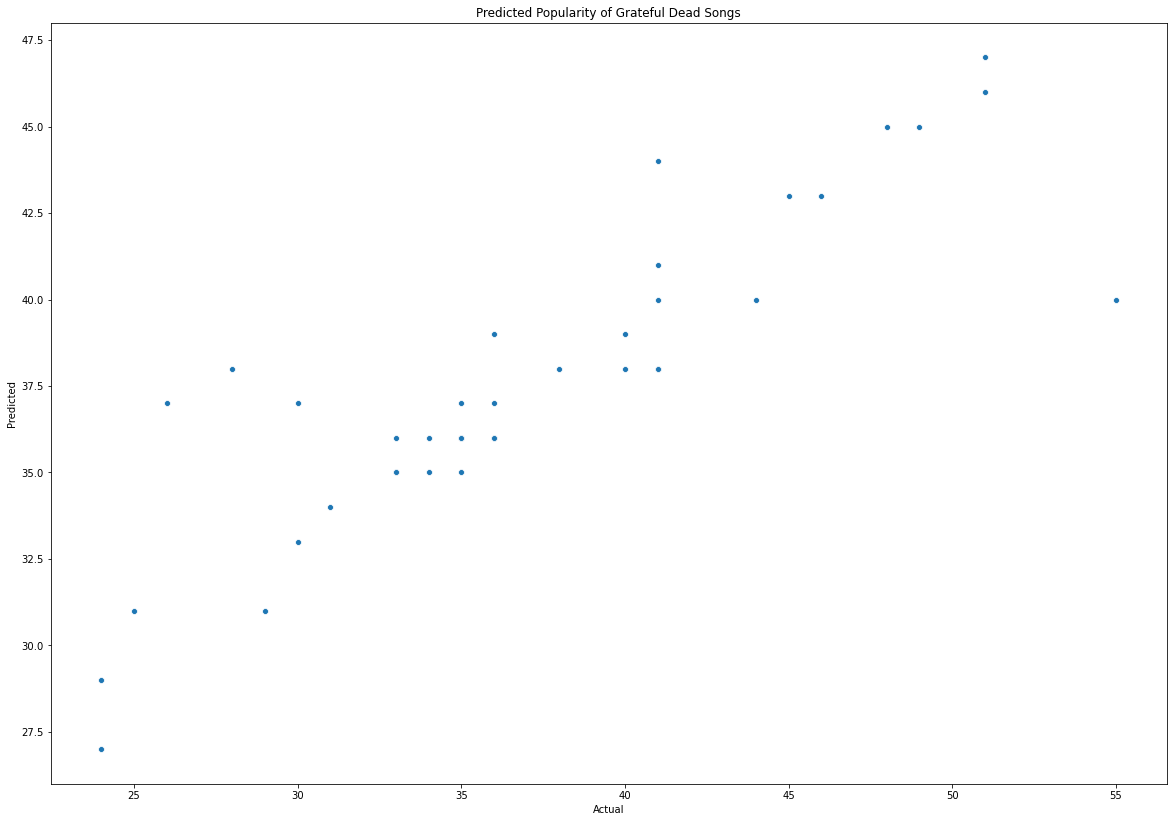

In [64]:
# Plot predicted popularity values vs actual vals
plt.figure(figsize=(20, 14))
axs = sns.scatterplot(actual,predicted)
axs.set_title('Predicted Popularity of Grateful Dead Songs')
axs.set_ylabel('Predicted')
axs.set_xlabel('Actual')
plt.show()

The predicted values are pretty accurate overall. There are obviously a lot of outside factors that influence a song's popularity, leaving us with the outlier songs that drastically overperform or underperform their metrics.

### Case Study: Generalized

In [57]:
# Input band with format: "['The Beatles']" output plot of predicted values vs actual values
def analyze_band_predictions(band):  
    artist_df = band_df(band)
    actual = []
    predicted = []
    
    for i in range(artist_df.shape[0]):
        actual.append(artist_df.iloc[i]['popularity'])
        predicted.append(int(song_popularity_prediction(band, artist_df.iloc[i].name)))

    plt.figure(figsize=(20, 14))
    plt.scatter(actual,predicted)
    plt.title('Predicted Popularity of {} Songs'.format(band))
    plt.ylabel('Predicted')
    plt.xlabel('Actual')

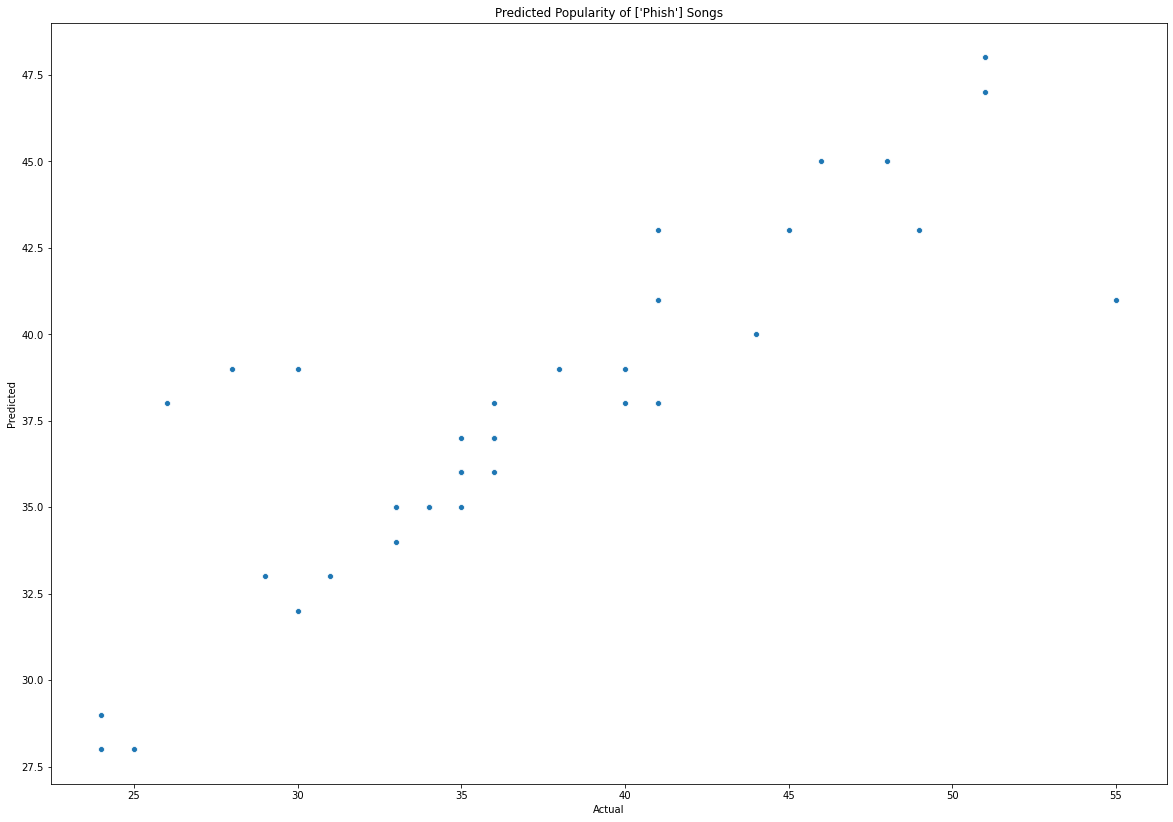

In [92]:
analyze_band_predictions("['Phish']")

In [58]:
song_popularity_prediction("['Phish']", 'Sample in a Jar', prnt=True)

Predicted popularity for the song Sample in a Jar is [46.56]. The actual popularity is 51.


## Conclusion

With my initial model, I was getting slightly larger errors. Introducing a new feature, the mean popularity of all of an artist's songs, led to a decrease in the model's MAE by around 13% and increased the R squared score by 7%. This project has me curious about the various ways the accuracy could be improved. A few promising ideas I have considered are: a method for contextualizing songs, this could incorporate regional and historical cluster analysis on artists and songs. Or another promising frontier is the use of neural networks for classifying genres or feeling throughout a song. This obviously would require significant computing power and data warehousing.